## Implementing Neural Networks from Scratch

### **Part 1: Coding Neurons and Layers**

In [1]:
# Coding our first neuron with 3 inputs

inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = (inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + bias)

print(output)

2.3


In [2]:
# Coding our second neuron with 4 inputs

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = (
    inputs[0] * weights[0] + inputs[1] * weights[1] +
    inputs[2] * weights[2] + inputs[3] * weights[3] + bias
)

print(output)

4.8


In [3]:
# Coding our first layer 

inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights1 = weights[0]   # List of all weights associated with 1st Neuron: W11, W12, W13, W14
weights2 = weights[1]   # List of all weights associated with 2nd Neuron: W21, W22, W23, W24
weights3 = weights[2]   # List of all weights associated with 3rd Neuron: W31, W32, W33, W34

output = [
    # Neuron 1
    inputs[0] * weights1[0] + 
    inputs[1] * weights1[1] +
    inputs[2] * weights1[2] +
    inputs[3] * weights1[3] + biases[0],

    # Neuron 2
    inputs[0] * weights2[0] + 
    inputs[1] * weights2[1] +
    inputs[2] * weights2[2] +
    inputs[3] * weights2[3] + biases[1],

    # Neuron 3
    inputs[0] * weights3[0] + 
    inputs[1] * weights3[1] +
    inputs[2] * weights3[2] +
    inputs[3] * weights3[3] + biases[2],
]

print(output)

[4.8, 1.21, 2.385]


```
output = summation of (inputs * weights) + bias

output = (w1x1 + w2x2 + w3x3 + b)
```

In [4]:
# Using loops for better and easier coding

inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer_outputs = [] # output for current layer

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0 # Placeholder output variable
    
    for n_input, weight in zip(inputs, neuron_weights):
        # Multiply this input by associated weight and add to the neuron's output variable
        neuron_output += n_input * weight
    neuron_output += neuron_bias # Adding bias 
    
    layer_outputs.append(neuron_output)

print(layer_outputs)



[4.8, 1.21, 2.385]


### **Part 2: Using Numpy to Code Neurons and Layers**}

####  Rules of Matrix Multiplication:
1. The **number of columns** in the first matrix must equal the **number of rows** in the second matrix.  
   - If `A` is (m × n) and `B` is (n × p), then `A × B` is defined.

2. The result will be a matrix of size **(m × p)**.

3. Each element in the result is computed by the **dot product** of a row from `A` and a column from `B`.


#### Rules of Dot Products

1. The dot product between a vector A and vector B,    `np.dot(A, B) == np.dot(B, A)`

2. The dot product between a vector A and matrix B,    `np.dot(A, B) != np.dot(B, A)`

3. The dot product between a matrix A and matrix B,    `np.dot(A, B) == A X B`

In [5]:
# Coding a neuron using NumPy

import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs = np.dot(weights, inputs) + bias
print(outputs)

4.8


In [6]:
# Coding layers using NumPy

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

# A dot product of a matrix and a vector results in a list of dot products. 
# The np.dot() method treats the matrix as a list of vectors and performs a dot product of each of those vectors with the other vector

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


In [7]:
# Coding layers of neurons and batch of data using NumPy

inputs = [[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

# We cannot tranpose lists in Python, so we have to convert the lists into an array first.

outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [8]:
# 2 layers and batch of data using NumPy

inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights1 = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

# Calculating the output of the first layer

layer1_outputs = np.dot(inputs, np.array(weights1).T) + biases1

# Calculating the output of the second layer

layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


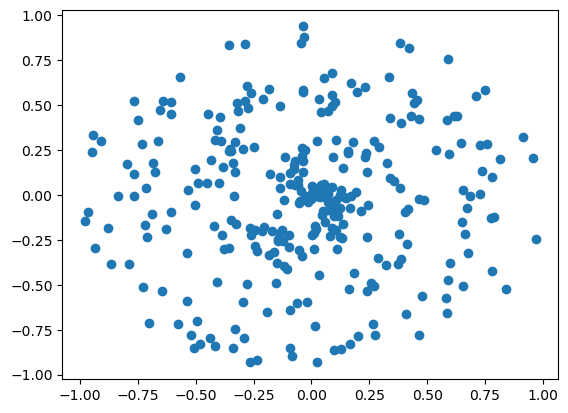

In [9]:
# Generating Non-Linear Training Data

from nnfs.datasets import spiral_data
import numpy as np
import matplotlib.pyplot as plt
import nnfs

nnfs.init()
X, Y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

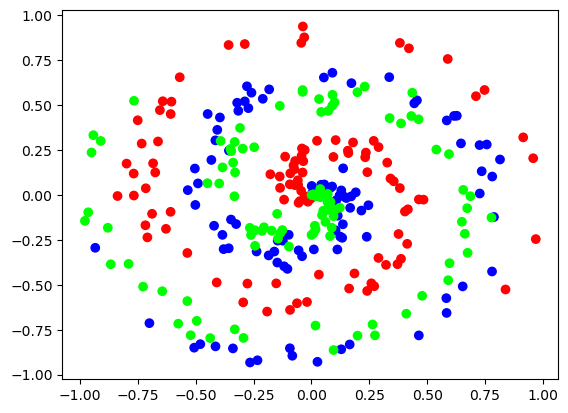

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'brg')
plt.show()

The neural network is not aware of the color differences as the data have no class encodings.

### **Part 3: Implementing Dense Layer Class**

A `Dense Layer` (Fully Connected Layer) is one of the fundamental building blocks of a neural network.

It’s called dense (fully connected) because every neuron in the layer is connected to every neuron in the previous layer.

In [11]:
import numpy as np

class DenseLayer: # Hidden Layers 
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initializing weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) # 0.01 is a small value to prevent large initial weights
        self.biases = np.zeros((1, n_neurons))
        
    # Forward Propagation
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output

In [12]:
# Creating dataset
X, Y = spiral_data(samples = 100, classes = 3)

# Create Dense layer with 2 input features and 3 output values
dense_layer1 = DenseLayer(2, 3)

# Performing forward propagation of our training data through this layer
dense_layer_output = dense_layer1.forward(X)

print(dense_layer_output[:5])


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


### Array Summation in Python

Suppose we have a 3x3 array `A`: 
```python
A =    [[1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]]


np.sum(A) will return [1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9] = 45 # Total sum of all elements
np.sum(A, axis = 0) will return [12, 15, 18]  # Sum along columns
np.sum(A, axis = 1) will return [6, 15, 24] # Sum along rows
np.sum(A, axis = 2) will return [45]  # Sum along the last

np.sum(A, axis = 0, keepdims = True) will return [[12, 15, 18]]  # Sum along columns with dimensions preserved
np.sum(A, axis = 1, keepdims = True) will return [[6], [15], [24]]  # Sum along rows with dimensions preserved

```


### Array Broadcasting in Python

When performing operations on arrays of different shapes, NumPy automatically expands the smaller array to match the shape of the larger one. This is known as **broadcasting**.
Broadcasting allows vectorized operations without the need for explicit loops, making computations faster and code cleaner.
<br>

**Rules of Broadcasting:**
1. NumPy compares array **shapes element-wise from right to left** (starting from the last dimension).
2. Two dimensions are compatible if:
 - They are equal, OR  
 - One of them is **1** (it can be stretched to match the other), OR  
 - One of them **does not exist** (i.e., it's treated as 1 for broadcasting).
3. If these rules are not met, a `ValueError` occurs.

<br>

```python
# For example, if we have a 3x3 array `A` and a 1D array `B` of shape (3,), NumPy will broadcast `B` to match the shape of `A` during operations.
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
B = np.array([1, 2, 3])

C = A + B  # Broadcasting B to match A's shape

print("Result:", C)

# Result: [[2, 4, 6], 
#          [5, 7, 9], 
#          [8, 10, 12]]

# What internally happens is that NumPy treats B as if it were [[1, 2, 3], [1, 2, 3], [1, 2, 3]] during the addition.
```


### Finding the Largest Element in Each Row of a 2D Array

Suppose we want to find the **largest element in each row** of a 2D array `A` and then subtract it from each element in the same row.  
We will explore two cases:
- Case 1: Without `keepdims`
- Case 2L With `keepdims`

#### **Example Array**
```python
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Case 1: Without keepdims

row_max = np.max(A, axis = 1)  # Shape: (3,)
print(row_max)
# Output: [3 6 9]

result = A - row_max
print(result)
# ValueError: operands could not be broadcast together with shapes (3,3) (3,)
# When subtracting from A (shape (3,3)), NumPy tries to broadcast (3,) across (3,3). It treats row_max as acting on columns, not rows, which is not what we want.
```

```python
# Case 2: With keepdims=True

row_max = np.max(A, axis = 1, keepdims = True)  # Shape: (3, 1)
print(row_max)
# Output:
# [[3]
#  [6]
#  [9]]

result = A - row_max
print(result)
# Output:
# [[-2 -1  0]
#  [-2 -1  0]
#  [-2 -1  0]]

# The subtraction works correctly because now row_max has the shape (3, 1), which can be broadcasted across each row of A.
```

In [13]:
# Solved Example

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Total sum of all elements
print("Total sum of all elements:", np.sum(A))  

# Sum along columns (axis = 0)
print("\nSum along columns (axis = 0):", np.sum(A, axis = 0))
print("Shape of sum along columns:", np.sum(A, axis = 0).shape)

# Sum along rows (axis = 1)
print("\nSum along rows (axis = 1):", np.sum(A, axis = 1))
print("Shape of sum along rows:", np.sum(A, axis = 1).shape)

# Sum along columns with keepdims = True
print("\nSum along columns with keepdims = True:", np.sum(A, axis = 0, keepdims = True))
print("Shape (keepdims = True) for columns:", np.sum(A, axis = 0, keepdims = True).shape)

# Sum along rows with keepdims = True
print("\nSum along rows with keepdims = True:", np.sum(A, axis = 1, keepdims = True))
print("Shape (keepdims = True) for rows:", np.sum(A, axis = 1, keepdims = True).shape)

# Maximum values along columns (axis = 0)
print("\nMaximum along columns (axis = 0):", np.max(A, axis = 0))

# Maximum values along rows (axis = 1)
print("Maximum along rows (axis = 1):", np.max(A, axis = 1))


Total sum of all elements: 45

Sum along columns (axis = 0): [12 15 18]
Shape of sum along columns: (3,)

Sum along rows (axis = 1): [ 6 15 24]
Shape of sum along rows: (3,)

Sum along columns with keepdims = True: [[12 15 18]]
Shape (keepdims = True) for columns: (1, 3)

Sum along rows with keepdims = True: [[ 6]
 [15]
 [24]]
Shape (keepdims = True) for rows: (3, 1)

Maximum along columns (axis = 0): [7 8 9]
Maximum along rows (axis = 1): [3 6 9]


### **Part 4: Implementing Activation Functions**

`Activation functions` are crucial in neural networks because they introduce **non-linearity**, allowing the network to learn complex patterns and relationships.  

If an activation function were **linear**, the output of each layer would just be a **linear combination** of the inputs, regardless of how many layers you stack.  
This would effectively reduce a multi-layer neural network to a **single-layer linear model**, severely limiting its power.

#### Why Non-Linearity is Important?
- Real-world data is **not linearly separable** (e.g., images, speech, language).
- Non-linear activation functions allow networks to approximate **any arbitrary function** (as per the **Universal Approximation Theorem**).
- They enable **deep architectures** where each layer learns progressively complex features.


#### **ReLu Activation Function**

**ReLU** (Rectified Linear Unit) is one of the **most widely used activation functions** in modern neural networks.  

It is defined as: `f(x) = max(0, x)`


#### Why ReLU?
Before ReLU, activation functions like **sigmoid** and **tanh** were popular but had major drawbacks:
1. **Vanishing Gradients Problem:**  
   For large positive or negative values, sigmoid and tanh saturate (their gradients become near zero), making it difficult for weights to update during backpropagation.
   
2. **Slow Convergence:**  
   The output range of sigmoid is (0,1), and tanh is (-1,1). Their squashed gradients slow down training.

**ReLU solves these issues by being:**
- **Non-saturating for positive values** → No vanishing gradient problem (for x > 0).
- **Sparse activation** (many neurons output zero) → Efficient representation.
- **Computationally simple** (just a `max(0,x)` comparison).


In [14]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs) 
print(output) # It'll replace all negative values with 0, effectively implementing the ReLU activation function

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [15]:
# Implementing ReLu Activation Function

class ReLuActivation:
    # Forward Propagation
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        return self.output

In [16]:
# Create dataset
X, Y = spiral_data(samples = 100, classes = 3)

# Create Dense layer with 2 input features and 3 output values
dense_layer1 = DenseLayer(2, 3)

# Make a forward pass of our training data through Dense layer
dense_layer_output = dense_layer1.forward(X)

# Creating ReLu activation function to use with the output of Dense Layer
relu_activation = ReLuActivation()

relu_activation_output = relu_activation.forward(dense_layer_output) # Forward pass through this layer

print(relu_activation_output[:5])


[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


#### **Softmax Activation Function**

The **Softmax function** is a type of activation function that converts a vector of raw scores (logits) into probabilities. It is desiged to be used in the output layer of a neural network for multi-class classification problems.

It is defined as: `f(x) = exp(y_i) / sum(exp(y_k)) for all k`

Where:
- `y_i` is the raw score (logit) for class `i`.
- `exp(y_i)` is the exponential of that score.
- `sum(exp(y_k))` is the sum of exponentials of all logits.

In [17]:
inputs = [
 [1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]]

# Get unnormalized probabilities
exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True)) # Broadcasting to avoid overflow

# Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
print(probabilities)

np.sum(probabilities, axis = 1) # This should return an array of 1s, indicating that the probabilities sum to 1 for each sample


[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [18]:
# Implementing Sotfmax Activation Function

class SoftmaxActivation:
    # Forward Propagation
    def forward(self, inputs):
        # Get unnormalized probabilies
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probabilities
        return self.output


In [19]:
# Create dataset
X, Y = spiral_data(samples = 100, classes = 3)

# Create Dense layer with 2 input features and 3 output values
dense_layer1 = DenseLayer(2, 3)

# ReLu activation function to use with Dense Layer
relu_activation = ReLuActivation()

# Create another Dense layer with 3 input features (output of previous layer as inputs)
dense_layer2 = DenseLayer(3, 3)

# Softmax activation function to use with Dense Layer
softmax_activation = SoftmaxActivation()

In [20]:
# Make a forward pass of our training data through dense layer 1
dense_layer1_output = dense_layer1.forward(X)

# Passing the output of Dense layer 1 through ReLu activation function
relu_output = relu_activation.forward(dense_layer1_output)

# Make a forward pass through the dense layer 2 using the output from the relu activation function
dense_layer2_output = dense_layer2.forward(relu_output)

# Passing the output of Dense Layer 2 through Softmax activation function
softmax_output = softmax_activation.forward(dense_layer2_output)

print(softmax_output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333322 0.33333343 0.33333334]
 [0.33333296 0.33333388 0.3333332 ]
 [0.3333323  0.33333504 0.33333266]
 [0.33333194 0.33333552 0.33333248]]


**[Input: X (100 × 2)] → [Dense 1 (2→3)] → [ReLU] → [Dense 2 (3→3)]  → [Softmax] → [Output: Probabilities (100 × 3)]**

### **Part 5: Implementing Loss Functions**

- `Loss functions` measures how far an estimated value is from it's true value. It is used to determine which model is better.

- `Cost functions` refers to the aggregate of the loss functions over an entire dataset or a batch of data. It sums or averages the individual losses.


#### **Categorical Cross Entropy Loss**

It is used for Multi-Class Classification problems. It converts categories to One Hot Encoding and then calculates the loss based on the predicted probabilities.
 
Categorical Cross Entropy Loss is defined as: `Loss = -∑(y_true * log(y_pred))`


In [21]:
# Implementing Cross Entropy Loss Function for numerical classes

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


We can see the loss for the third class is lesser than that of the 2nd class.

In [22]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))

neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print(f"Average loss: {average_loss:.2f}")

[0.35667494 0.69314718 0.10536052]
Average loss: 0.39


In [23]:
# Implementing Cross Entropy Loss Function for One Hot Encoded classes

y_true_values = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

y_pred_values = np.array([
    [0.2, 0.7, 0.1],
    [0.8, 0.1, 0.1],
    [0.1, 0.2, 0.7]
])

cross_entropy_loss = y_true_values * y_pred_values
summation = np.sum(cross_entropy_loss, axis = 1)
neg_log = -np.log(summation)
print(neg_log)
print(f"Average loss: {neg_log.mean():.2f}")

[0.35667494 0.22314355 0.35667494]
Average loss: 0.31


We need to prevent very large or very small values when we take the log. Hence, we need to clip our predictions. 

In [24]:
# Implementing Loss Class

class Loss:
    # Calculates the data and regularization losses given model output and ground truth values
    def calculate(self, pred_output, actual_output):
        sample_losses = self.forward(pred_output, actual_output)
        # Calculation mean loss
        mean_loss = np.mean(sample_losses)
        return mean_loss

In [25]:
# Implementing Categorical Cross Entropy 

class CategoricalCrossEntropy(Loss):
    # Forward Propagation
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0, clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true] 

        # Probabilities for target values if one-hot encoded labels
        elif len(y_true.shape) == 2: 
            correct_confidences = np.sum(y_pred_clipped * y_true, axis = 1) 

        # Calculate Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [26]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 1, 0]])

cat_cross_entropy = CategoricalCrossEntropy()
loss = cat_cross_entropy.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


**What we have done till now!**

In [27]:
# Create dataset
X, Y = spiral_data(samples = 100, classes = 3)

# Create Dense layer with 2 input features and 3 output values
dense_layer1 = DenseLayer(2, 3)

# ReLu activation function to use with Dense Layer
relu_activation = ReLuActivation()

# Create another Dense layer with 3 input features (output of previous layer as inputs)
dense_layer2 = DenseLayer(3, 3)

# Softmax activation function to use with Dense Layer
softmax_activation = SoftmaxActivation()

# Create loss function
cat_cross_entropy = CategoricalCrossEntropy()

# Make a forward pass of our training data through dense layer 1
dense_layer1_output = dense_layer1.forward(X)

# Passing the output of Dense layer 1 through ReLu activation function
relu_output = relu_activation.forward(dense_layer1_output)

# Make a forward pass through the dense layer 2 using the output from the relu activation function
dense_layer2_output = dense_layer2.forward(relu_output)

# Passing the output of Dense Layer 2 through Softmax activation function
softmax_output = softmax_activation.forward(dense_layer2_output)

print(softmax_output[:5])

# Perform a forward pass through activation function, it takes the output of second dense layer here and returns loss
loss = cat_cross_entropy.calculate(softmax_output, Y)
print("Categorical Cross Entropy loss: ", loss)

[[0.33333334 0.33333334 0.33333334]
 [0.3333327  0.33333316 0.33333412]
 [0.3333331  0.33333325 0.3333336 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
Categorical Cross Entropy loss:  1.0986098


The `loss` is very high for our classification problem. We need to reduce it by adjusting the weights and biases of our model.

#### **Introducing Accuracy**

In [28]:
# Probabilities of 3 samples
softmax_outputs = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]])

# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])

# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis = 1)

# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)

# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('Accuracy:', accuracy)

Accuracy: 1.0


### **Part 6: Introducing Optimization**

#### **Strategy 1: Randomly Select Weights and Biases**

- Pick weights and biases randomly

- Calculate loss

- Iterate 

- Choose the weights and biases which gives lowest loss


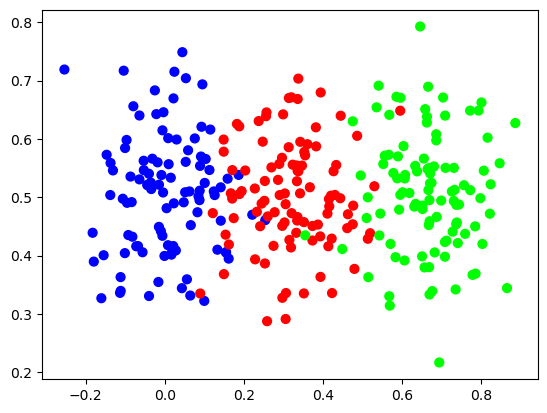

In [29]:
# Creating a simple sample dataset

from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt
X, Y = vertical_data(samples = 100, classes = 3)

plt.scatter(X[:, 0], X[:, 1], c = Y, s = 40, cmap = 'brg')
plt.show()

In [30]:
# Creating the model
dense_layer1 = DenseLayer(2, 3)
activation_layer1 = ReLuActivation()

dense_layer2 = DenseLayer(3, 3)
activation_layer2 = SoftmaxActivation()

loss_function = CategoricalCrossEntropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense_layer1.weights.copy()
best_dense1_biases = dense_layer1.biases.copy()
best_dense2_weights = dense_layer2.weights.copy()
best_dense2_biases = dense_layer2.biases.copy()

for iteration in range(10000):
    dense_layer1.weights = 0.05 * np.random.randn(2, 3)
    dense_layer1.biases = 0.05 * np.random.randn(1, 3)
    dense_layer2.weights = 0.05 * np.random.randn(3, 3)
    dense_layer2.biases = 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense_layer1.forward(X)
    activation_layer1.forward(dense_layer1.output)
    dense_layer2.forward(activation_layer1.output)
    predicted_output = activation_layer2.forward(dense_layer2.output)

    loss = loss_function.calculate(pred_output = predicted_output, actual_output = Y)
    
    # Calculate accuracy from output of activation2 and targets and calculate values along first axis
    predictions = np.argmax(predicted_output, axis = 1)
    accuracy = np.mean(predictions == Y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'accuracy:', accuracy)
        best_dense1_weights = dense_layer1.weights.copy()
        best_dense1_biases = dense_layer1.biases.copy()
        best_dense2_weights = dense_layer2.weights.copy()
        best_dense2_biases = dense_layer2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0999203 accuracy: 0.5533333333333333
New set of weights found, iteration: 2 loss: 1.0982856 accuracy: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0982594 accuracy: 0.3333333333333333
New set of weights found, iteration: 33 loss: 1.0980135 accuracy: 0.3333333333333333
New set of weights found, iteration: 138 loss: 1.0976944 accuracy: 0.3333333333333333
New set of weights found, iteration: 220 loss: 1.0971756 accuracy: 0.3333333333333333
New set of weights found, iteration: 1337 loss: 1.0967919 accuracy: 0.3333333333333333
New set of weights found, iteration: 2039 loss: 1.0967497 accuracy: 0.3333333333333333
New set of weights found, iteration: 4759 loss: 1.095946 accuracy: 0.3333333333333333
New set of weights found, iteration: 8107 loss: 1.0954286 accuracy: 0.6466666666666666
New set of weights found, iteration: 8357 loss: 1.0953574 accuracy: 0.3333333333333333


**Strategy 1 does not work!**

#### **Strategy 2: Randomly Adjust Weights and Biases**

- If loss decreases for some weights, biases -> choose the next value of weights and biases closer to the current w, b

- If loss increases, don't update the weights and biases values


In [31]:
# Creating the model
dense_layer1 = DenseLayer(2, 3)
activation_layer1 = ReLuActivation()

dense_layer2 = DenseLayer(3, 3)
activation_layer2 = SoftmaxActivation()

loss_function = CategoricalCrossEntropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense_layer1.weights.copy()
best_dense1_biases = dense_layer1.biases.copy()
best_dense2_weights = dense_layer2.weights.copy()
best_dense2_biases = dense_layer2.biases.copy()

for iteration in range(10000):
    # Update weights with some small random values
    dense_layer1.weights += 0.05 * np.random.randn(2, 3)
    dense_layer1.biases += 0.05 * np.random.randn(1, 3)
    dense_layer2.weights += 0.05 * np.random.randn(3, 3)
    dense_layer2.biases += 0.05 * np.random.randn(1, 3)

    
    # Perform a forward pass of the training data through this layer
    dense_layer1.forward(X)
    activation_layer1.forward(dense_layer1.output)
    dense_layer2.forward(activation_layer1.output)
    predicted_output = activation_layer2.forward(dense_layer2.output)

    loss = loss_function.calculate(pred_output = predicted_output, actual_output = Y)

     # Calculate accuracy from output of activation2 and targets and calculate values along first axis
    predictions = np.argmax(predicted_output, axis = 1)
    accuracy = np.mean(predictions == Y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'accuracy:', accuracy)
        best_dense1_weights = dense_layer1.weights.copy()
        best_dense1_biases = dense_layer1.biases.copy()
        best_dense2_weights = dense_layer2.weights.copy()
        best_dense2_biases = dense_layer2.biases.copy()
        lowest_loss = loss
    else:
        dense_layer1.weights = best_dense1_weights.copy()
        dense_layer1.biases = best_dense1_biases.copy()
        dense_layer2.weights = best_dense2_weights.copy()
        dense_layer2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 1.1003902 accuracy: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.100305 accuracy: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0994121 accuracy: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0985956 accuracy: 0.3333333333333333
New set of weights found, iteration: 33 loss: 1.0984128 accuracy: 0.3333333333333333
New set of weights found, iteration: 34 loss: 1.0977695 accuracy: 0.3333333333333333
New set of weights found, iteration: 35 loss: 1.097679 accuracy: 0.3333333333333333
New set of weights found, iteration: 37 loss: 1.0948764 accuracy: 0.3333333333333333
New set of weights found, iteration: 38 loss: 1.0947542 accuracy: 0.3333333333333333
New set of weights found, iteration: 39 loss: 1.0921181 accuracy: 0.6633333333333333
New set of weights found, iteration: 42 loss: 1.0888232 accuracy: 0.36333333333333334
New set of weights found, iteration: 47 loss: 1.0874367 accuracy: 0.3

See how significantly we reduced the loss... **Strategy 2 works**

Even though the Strategy 2 works, it is not efficient. We need to find a better way to update the weights and biases.
For that we need to understand `Backpropagation` and how it works.

### **Part 7: Backpropagation**

`Backpropagation` is a method used in artificial neural networks to calculate the gradient of the loss function with respect to each weight by the chain rule, allowing for efficient computation of gradients.

This process involves:
1. **Forward Pass**: Compute the output of the network given the input data.

2. **Loss Calculation**: Calculate the loss using a loss function (e.g., categorical cross-entropy).

3. **Backward Pass**: Compute the gradients of the loss with respect to the weights and biases using the chain rule.

4. **Weight Update**: Adjust the weights and biases using the computed gradients and a learning rate.

The weight update rule can be expressed as:
```python
w = w - learning_rate * gradient
b = b - learning_rate * gradient
``` 

In [32]:
# Coding Back Propagation on a single neuron
import numpy as np

# Initial parameters
inputs = np.array([1.0, -2.0, 3.0])
weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
target_output = 0.0
learning_rate = 0.001

def ReLu(x):
    return np.maximum(0, x)

def ReLu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

for iteration in range(200):
    # Forward Propagation
    linear_output = np.dot(weights, inputs) + bias
    output = ReLu(linear_output)
    # Squared loss
    loss = (output - target_output) ** 2

    # Backward Propagation
    
    # Gradient of loss w.r.t. output
    dloss_doutput = 2 * (output - target_output) # Loss = (yi−yi^)2  ⇒  ∂L/∂a​ = 2 * (yi−yi^)
    # Derivative of ReLU
    doutput_dlinear = ReLu_derivative(linear_output) # ∂a/∂z = {1: if z > 0, 0: otherwise}
    
    dlinear_dweights = inputs
    dlinear_dbias = 1.0

    # Combining ∂L/∂z
    dloss_dlinear = dloss_doutput * doutput_dlinear
    # Calculation ∂z/∂w
    dloss_dweights = dloss_dlinear * dlinear_dweights
    # Calculating ∂z/∂b
    dloss_dbias = dloss_dlinear * dlinear_dbias

    # Updating weights and biases
    weights -= learning_rate * dloss_dweights
    bias -= learning_rate * dloss_dbias

    print(f"Iteration {iteration + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bias)

Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872397424621624
Iteration 3, Loss: 31.87054345809546
Iteration 4, Loss: 29.98699091998773
Iteration 5, Loss: 28.214761511794592
Iteration 6, Loss: 26.54726775906168
Iteration 7, Loss: 24.978326552541866
Iteration 8, Loss: 23.5021050739742
Iteration 9, Loss: 22.11313179151597
Iteration 10, Loss: 20.806246424284897
Iteration 11, Loss: 19.576596334671486
Iteration 12, Loss: 18.41961908608719
Iteration 13, Loss: 17.33101994032309
Iteration 14, Loss: 16.306757070164853
Iteration 15, Loss: 15.343027506224132
Iteration 16, Loss: 14.436253786815284
Iteration 17, Loss: 13.583071280700132
Iteration 18, Loss: 12.780312744165439
Iteration 19, Loss: 12.024995767388878
Iteration 20, Loss: 11.314319082257104
Iteration 21, Loss: 10.64564263994962
Iteration 22, Loss: 10.016485041642266
Iteration 23, Loss: 9.424510031713222
Iteration 24, Loss: 8.867521365009814
Iteration 25, Loss: 8.34345204094211
Iteration 26, Loss: 7.850353118483743
Iteration 27, Loss: 7.3

#### **Backpropagation through an entire layer of Neurons**

In [33]:
# Initial parameters

inputs = np.array([1, 2, 3, 4])
weights = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 1.1, 1.2]
])
biases = np.array([0.1, 0.2, 0.3])
learning_rate = 0.001

# ReLu Activation Function and it's derivative
def ReLu(x):
    return np.maximum(0, x)

def ReLu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

# Training Loop
for iteration in range(200):
    # Forward Propagation
    z = np.dot(weights, inputs) + biases # Linear Transformation
    a = ReLu(z)                          # ReLu Activation Function
    y = np.sum(a)                        # Summation of activation function outputs

    # Loss
    loss = y ** 2 

    # Backward Propagation -> ∂L/∂Wij = ∂L/∂y * ∂y/∂ai * ∂ai/∂zi * ∂zi/∂wij(inputs)
    
    # Gradient of loss with respect to output y
    dL_dy =  2 * y 

    # Gradient of y with respect to a
    dy_da = np.ones_like(a) 

    # Gradient of loss with respect to a (Partial derivative of dL_da)
    dL_da = dL_dy * dy_da

    # Gradient of a with respect to z (ReLu derivative)
    da_dz = ReLu_derivative(z)

    # Gradient of loss with respect to z (Partial derivative of dL_dz)
    dL_dz = dL_da * da_dz

    # Gradient of z with respect to weights and biases
    dL_dW = np.outer(dL_dz, inputs)
    dL_db = dL_dz # We don't need to calculate the gradient of loss with respect to biases in this case, but it's included for completeness 

    # Update weights and biases
    weights -= learning_rate * dL_dW
    biases -= learning_rate * dL_db

    # Print the loss every 20 iterations
    if iteration % 20 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")


# Final weights and biases
print("Final weights:\n", weights)
print("Final biases:\n", biases)

Iteration 0, Loss: 466.56000000000006
Iteration 20, Loss: 5.329595763793193
Iteration 40, Loss: 0.41191524253483786
Iteration 60, Loss: 0.03183621475376345
Iteration 80, Loss: 0.002460565405431671
Iteration 100, Loss: 0.0001901729121621426
Iteration 120, Loss: 1.4698120139337557e-05
Iteration 140, Loss: 1.1359948840900371e-06
Iteration 160, Loss: 8.779778427447647e-08
Iteration 180, Loss: 6.785903626216421e-09
Final weights:
 [[-0.00698895 -0.0139779  -0.02096685 -0.0279558 ]
 [ 0.25975286  0.11950571 -0.02074143 -0.16098857]
 [ 0.53548461  0.27096922  0.00645383 -0.25806156]]
Final biases:
 [-0.00698895 -0.04024714 -0.06451539]


#### **The Problem with Per-Neuron Gradient Calculation**

In a **fully connected layer** of a neural network, each neuron has its own set of weights.  
If we were to calculate the gradient for **each neuron individually**, we would:
- Perform **many repetitive computations**.
- Miss the chance to use **highly optimized matrix operations**.
- Have slower training, especially for **large networks**.

Instead of processing **one neuron at a time**, we calculate the gradients for the **entire layer in one step** using **matrix multiplication**.

We can fix the issue by calculating the gradient for the entire layer at once, which is more efficient and leverages matrix operations.

- **Gradient Loss with respect to weights**: X^T * dL/dZ

- **Gradient Loss with respect to biases**: sum(dL/dZ, axis = 0, keepdims = True)

- **Gradient Loss with respect to inputs**: dL/dZ * W^T


#### **Visual Representation of these Gradients**

![Gradients of Loss with respect to weights](images/dWeights.png)

![Gradients of Loss with respect to biases](images/dBiases.png)

!![Gradients of Loss with respect to inputs](images/dInputs.png)

#### **Gradients of Loss with respect to weights**

In [35]:
# Passed-in gradient from the next layer for the purpose of this example we're going to use an array of an incremental gradient values
dLoss_dZ = np.array([
 [1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]
])

# We sets(batches) of inputs
inputs = np.array([
 [1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]
])

dLoss_dW = np.dot(inputs.T, dLoss_dZ)
print(dLoss_dW)



[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


#### **Gradients of Loss with respect to biases**

In [37]:
# Passed-in gradient from the next layer for the purpose of this example we're going to use an array of an incremental gradient values
dLoss_dZ = np.array([
 [1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]
])

# One bias for each neuron, biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])

# dBiases = sum values, do this over samples (first axis), keepdims 
dLoss_dB = np.sum(dLoss_dZ, axis = 0, keepdims = True)
print(dLoss_dB)

[[6. 6. 6.]]


#### **Gradients of Loss with respect to inputs**

In [39]:
# Passed-in gradient from the next layer for the purpose of this example we're going to use an array of an incremental gradient values
dLoss_dZ = np.array([
 [1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]
])

# We have 3 sets of weights - one set for each neuron, we have 4 inputs, thus 4 weights, recall that we keep weights transposed
weights = np.array([
 [0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]).T

# Sum up weights of the given input and multiply by the passed-in gradient for this neuron
dLoss_dX = np.dot(dLoss_dZ, weights.T)
print(dLoss_dX)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


#### **Adding Backpropagation in the Dense Layer**

In [ ]:
class DenseLayer: # Hidden Layers 
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initializing weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) # 0.01 is a small value to prevent large initial weights
        self.biases = np.zeros((1, n_neurons))

        self.inputs = None      # will hold the input batch
        self.output = None      # forward output
        self.dweights = None    # gradient w.r.t. weights
        self.dbiases = None     # gradient w.r.t. biases
        self.dinputs = None     # gradient w.r.t. inputs
   
    # Forward Propagation
    def forward(self, inputs):
        # stores inputs for backward pass
        self.inputs = inputs 
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output
    
    # Backward Propagation
    # dvalues is dL/dZ coming from the next layer
    def backward(self, dvalues):
        # gradient w.r.t. weights:
        self.dweights = np.dot(self.inputs.T, dvalues)

        # gradient w.r.t. biases:
        self.biases = np.sum(dvalues, axis = 0, keepdims = True)

        # gradient w.r.t. inputs (to pass to previous layer)
        self.dinputs = np.dot(dvalues, self.weights.T)

        return self.dinputs